<a href="https://colab.research.google.com/github/diegotluz/projects-colab/blob/main/Exemplo_LSTM_Seq2Seq_Morte_e_vida_Severina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# Importação das bibliotecas necessárias
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences



In [30]:
# Carregar o texto do arquivo e transformar tudo para minúsculas para manter uniformidade
with open("morte_vida_severina.txt", "r", encoding='utf-8') as file:
    text = file.read().lower()
print(text)

— o meu nome é severino,
como não tenho outro de pia.
como há muitos severinos,
que é santo de romaria,
deram então de me chamar
severino de maria;
como há muitos severinos
com mães chamadas maria,
fiquei sendo o da maria
do finado zacarias.
mais isso ainda diz pouco:
há muitos na freguesia,
por causa de um coronel
que se chamou zacarias
e que foi o mais antigo
senhor desta sesmaria.
como então dizer quem falo
ora a vossas senhorias?
vejamos: é o severino
da maria do zacarias,
lá da serra da costela,
limites da paraíba.
mas isso ainda diz pouco:
se ao menos mais cinco havia
com nome de severino
filhos de tantas marias
mulheres de outros tantos,
já finados, zacarias,
vivendo na mesma serra
magra e ossuda em que eu vivia.
somos muitos severinos
iguais em tudo na vida:
na mesma cabeça grande
que a custo é que se equilibra,
no mesmo ventre crescido
sobre as mesmas pernas finas
e iguais também porque o sangue,
que usamos tem pouca tinta.
e se somos severinos
iguais em tudo na vida,
morremos

In [31]:
# Etapa 1: Tokenização
# Cria um Tokenizer para converter palavras em números, pois o modelo precisa de entradas numéricas
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])  # Adapta o tokenizer ao texto fornecido
total_words = len(tokenizer.word_index) + 1  # Contagem de palavras distintas (vocabulário)
print(total_words)

1538


In [32]:
# Etapa 2: Criação de Sequências
# Constrói sequências para o treinamento do modelo usando o texto original
input_sequences = []
for line in text.split("\n"):  # Divide o texto em linhas
    token_list = tokenizer.texts_to_sequences([line])[0]  # Converte palavras em índices numéricos
    for i in range(1, len(token_list)):  # Cria n-gramas para capturar dependências sequenciais
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)  # Adiciona cada sequência à lista de entradas

# Imprime último n_gram_sequence
print(n_gram_sequence)


[2, 30, 13, 123]


O comando pad_sequences recebe uma lista de listas (onde cada sublista é uma sequência de tokens) e preenche essas listas para que todas tenham o mesmo comprimento. Ele faz isso adicionando um valor especificado (por padrão, 0) no início ou no fim de cada sequência.

Parâmetro padding

Um dos parâmetros principais é padding, que define onde o preenchimento (ou padding) ocorrerá na sequência. Ele pode ter dois valores:
 * padding='pre': Adiciona o padding no início da sequência. Esse é o comportamento padrão.
 * padding='post': Adiciona o padding no final da sequência.


In [33]:
# Etapa 3: Padding e Criação dos rótulos (y)
# Ajusta todas as sequências para um comprimento fixo
max_sequence_len = max([len(x) for x in input_sequences])  # Encontra a sequência mais longa
print(max_sequence_len)
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')

10


In [34]:
# Separa os dados em X (entrada) e y (saída)
X, y = input_sequences[:,:-1], input_sequences[:,-1]  # Última palavra de cada sequência será a etiqueta
y = to_categorical(y, num_classes=total_words)  # Converte y para one-hot encoding

print(X[100])
print(y[100])
print(y.shape)

[  0   0   0   0   0   0 585   6 586]
[0. 0. 0. ... 0. 0. 0.]
(4590, 1538)


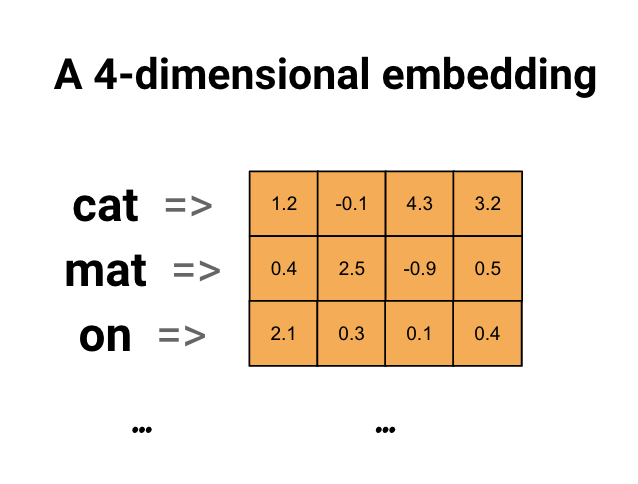

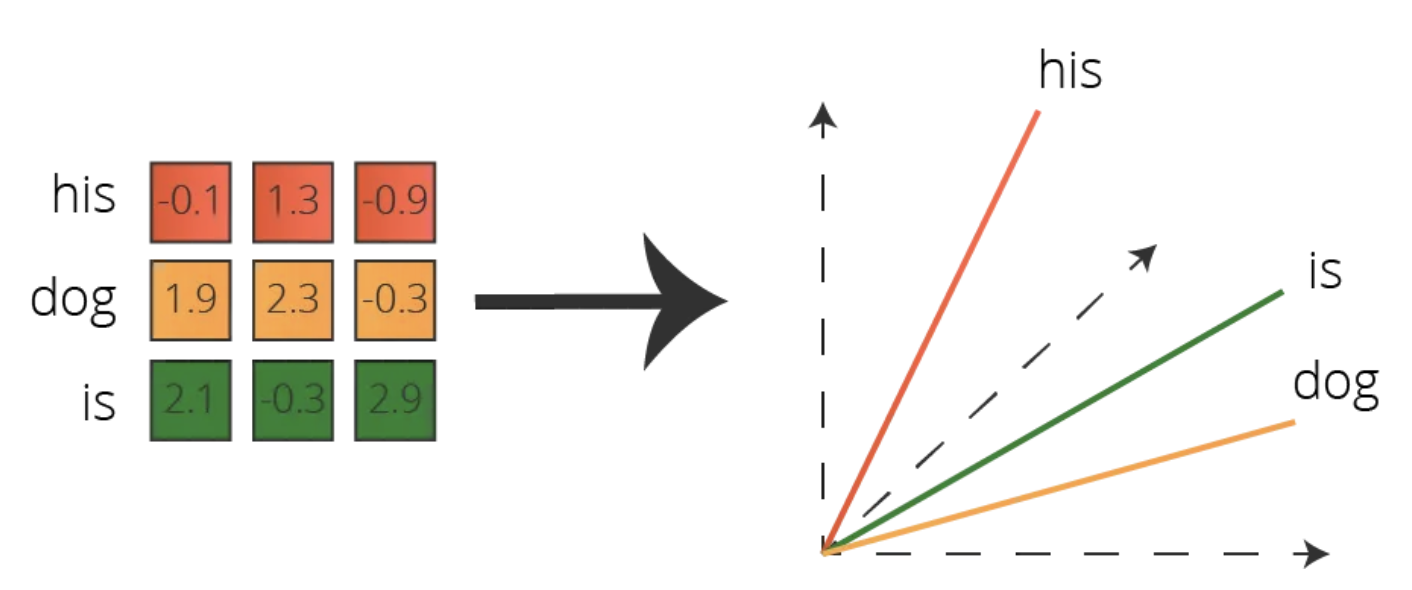

In [48]:
# Etapa 4: Construção do Modelo
# Define o modelo LSTM com camadas para gerar texto
model = Sequential()
# Camada Embedding para mapear palavras para vetores
#O parâmetro 100 na camada Embedding define a dimensão do vetor de embedding para cada palavra. Isso significa que cada palavra será representada como um vetor de 100 valores, ou seja, uma representação densa de 100 dimensões.
model.add(Embedding(input_dim=total_words, output_dim=100, input_length=max_sequence_len - 1))
model.add(LSTM(150, return_sequences=True))  # LSTM com 150 unidades, captura relações na sequência
model.add(Dropout(0.2))  # Dropout para evitar overfitting
model.add(LSTM(100))  # Outra camada LSTM
model.add(Dense(total_words, activation='softmax'))  # Camada densa com softmax para previsão de próxima palavra

# Compilação do modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [49]:
# Treinamento do modelo
model.fit(X, y, epochs=300, verbose=1, batch_size =16)  # Treina por 300 épocas

Epoch 1/300
287/287 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0326 - loss: 6.7642
Epoch 2/300
287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0386 - loss: 6.1957
Epoch 3/300
287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0506 - loss: 6.0274
Epoch 4/300
287/287 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.0532 - loss: 5.9733
Epoch 5/300
287/287 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0607 - loss: 5.8145
Epoch 6/300
287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0641 - loss: 5.7028
Epoch 7/300
287/287 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0662 - loss: 5.6654
Epoch 8/300
287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0842 - loss: 5.5289
Epoch 9/300
287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0783 - loss: 5.4171
Epoch 10/300
287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0871 - loss: 5.2950
Epoch 11/300
287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0985 - loss: 5.1647
Epoch 12/300
287/287 ━━━━━━━━━━━━━━━━━━━━

In [50]:
model.save('Modelo_VidaSeverina_LTSM_dim100_300.h5')

In [51]:
# prompt: carregue meu meu modelo pré treinado

from tensorflow.keras.models import load_model

# Substitua 'caminho/para/seu/modelo.h5' pelo caminho real do seu arquivo de modelo salvo
model = load_model('Modelo_VidaSeverina_LTSM_dim100_300.h5')

In [52]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 9, 100)              │         153,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 9, 150)              │         150,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 9, 150)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100)                 │         100,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1538)                │         155,338 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 560,140 (2.14 MB)

 Trainable params: 560,138 (2.14 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

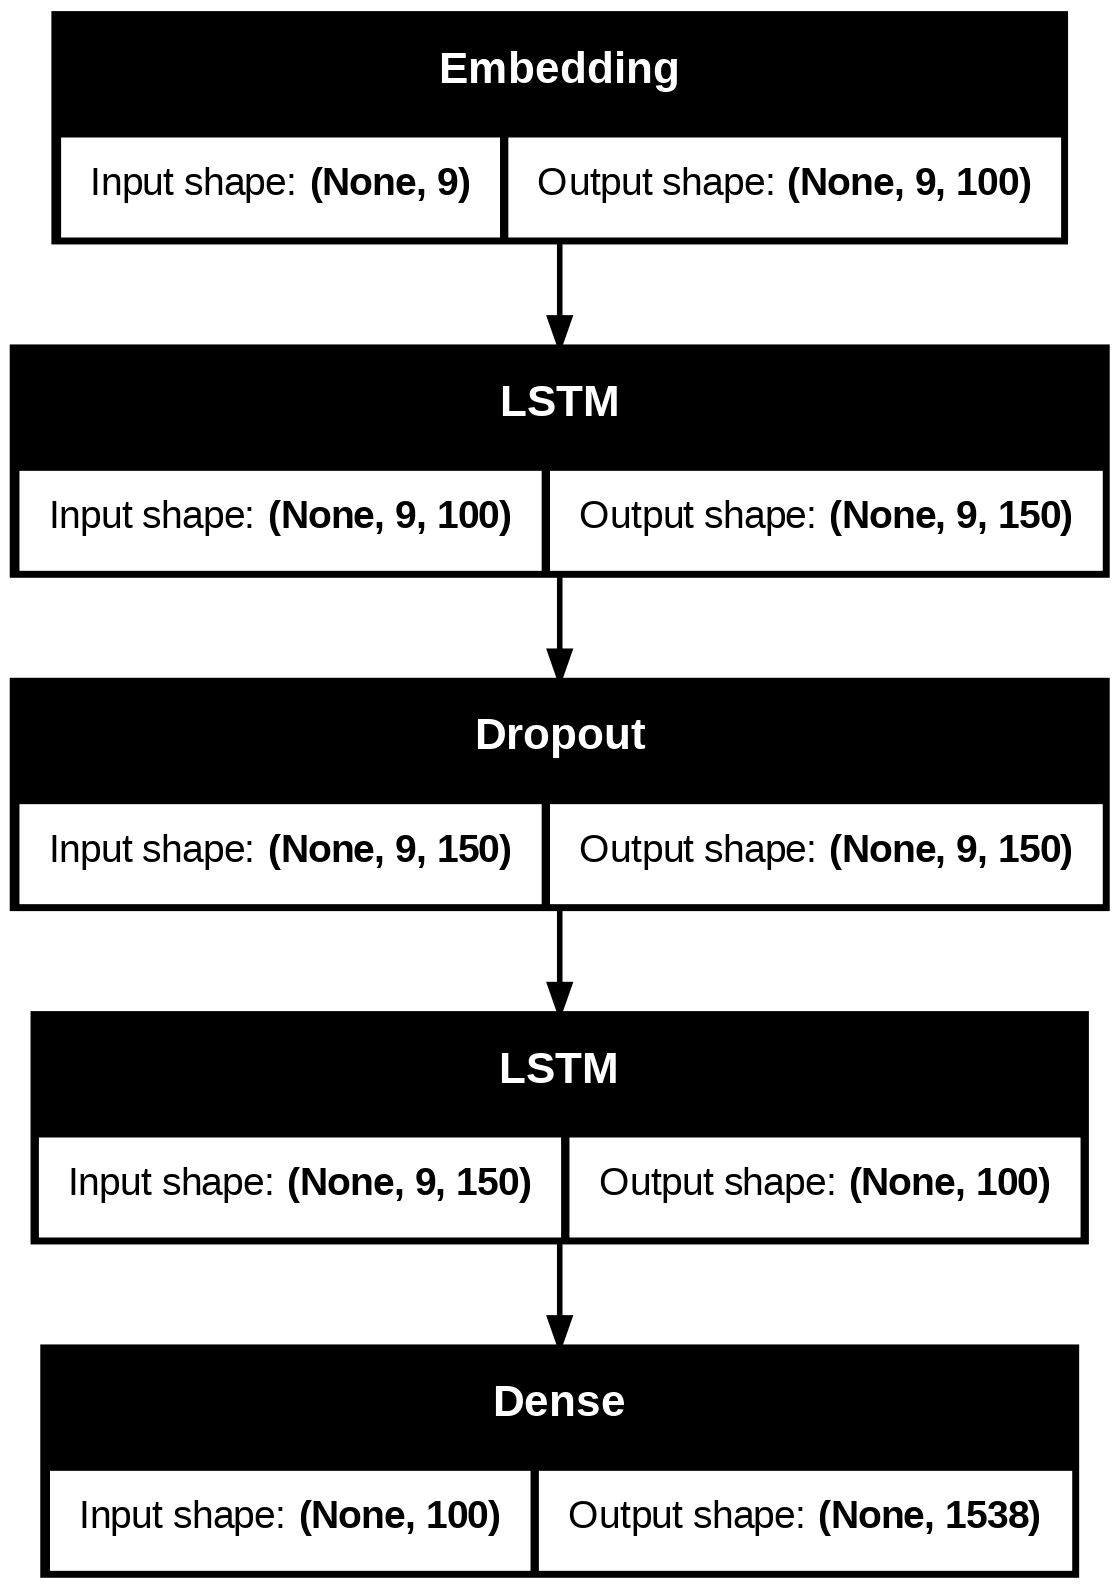

In [53]:
plot_model(model, show_shapes=True)

In [54]:
def gerar_texto(model, tokenizer, seed_text, max_sequence_len, next_words=50):
    """
    Gera texto com um modelo LSTM baseado em seed_text.

    Parâmetros:
    - model: o modelo LSTM treinado.
    - tokenizer: o tokenizer usado para indexar palavras.
    - seed_text: string inicial para começar a geração.
    - max_sequence_len: número máximo de palavras que o modelo aceita.
    - next_words: número de palavras a serem geradas.

    Retorna:
    - Texto gerado como string.
    """
    for _ in range(next_words):
        # Converte o seed_text para uma sequência numérica
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        #print(token_list)
        # Limita o token_list ao tamanho máximo especificado
        token_list = token_list[-(max_sequence_len - 1):]
        #print(token_list)
        # Realiza padding para que o token_list tenha o comprimento correto
        token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')
        print(token_list)
        # Faz a previsão da próxima palavra
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)

        # Converte o índice previsto de volta para uma palavra
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        # Adiciona a palavra prevista ao seed_text
        seed_text += " " + output_word

    return seed_text

In [55]:
seed_text = "talvez"
texto_gerado = gerar_texto(model, tokenizer, seed_text, max_sequence_len = 10, next_words=20)
print(texto_gerado)

[[   0    0    0    0    0    0    0    0 1478]]
[[   0    0    0    0    0    0    0 1478   78]]
[[   0    0    0    0    0    0 1478   78  105]]
[[   0    0    0    0    0 1478   78  105 1479]]
[[   0    0    0    0 1478   78  105 1479 1137]]
[[   0    0    0 1478   78  105 1479 1137  521]]
[[   0    0 1478   78  105 1479 1137  521  416]]
[[   0 1478   78  105 1479 1137  521  416  310]]
[[1478   78  105 1479 1137  521  416  310  359]]
[[  78  105 1479 1137  521  416  310  359 1077]]
[[ 105 1479 1137  521  416  310  359 1077    2]]
[[1479 1137  521  416  310  359 1077    2  388]]
[[1137  521  416  310  359 1077    2  388  138]]
[[ 521  416  310  359 1077    2  388  138    2]]
[[ 416  310  359 1077    2  388  138    2   13]]
[[ 310  359 1077    2  388  138    2   13  359]]
[[ 359 1077    2  388  138    2   13  359    7]]
[[1077    2  388  138    2   13  359    7    2]]
[[  2 388 138   2  13 359   7   2 198]]
[[388 138   2  13 359   7   2 198   7]]
talvez até lhe conquiste ouvido chegad

In [56]:
seed_text = "é difícil"
texto_gerado = gerar_texto(model, tokenizer, seed_text, max_sequence_len = 10, next_words=10)
print(texto_gerado)

[[  0   0   0   0   0   0   0   7 203]]
[[  0   0   0   0   0   0   7 203 487]]
[[  0   0   0   0   0   7 203 487   2]]
[[  0   0   0   0   7 203 487   2  29]]
[[  0   0   0   7 203 487   2  29 844]]
[[  0   0   7 203 487   2  29 844   2]]
[[  0   7 203 487   2  29 844   2 133]]
[[   7  203  487    2   29  844    2  133 1394]]
[[ 203  487    2   29  844    2  133 1394    2]]
[[ 487    2   29  844    2  133 1394    2  328]]
é difícil defender de um raio de mão rolete de setor de


In [57]:
seed_text = "morte"
texto_gerado = gerar_texto(model, tokenizer, seed_text, max_sequence_len =10, next_words=10)
print(texto_gerado)

[[ 0  0  0  0  0  0  0  0 36]]
[[ 0  0  0  0  0  0  0 36 50]]
[[   0    0    0    0    0    0   36   50 1300]]
[[   0    0    0    0    0   36   50 1300   97]]
[[   0    0    0    0   36   50 1300   97  402]]
[[   0    0    0   36   50 1300   97  402  123]]
[[   0    0   36   50 1300   97  402  123   90]]
[[   0   36   50 1300   97  402  123   90   27]]
[[  36   50 1300   97  402  123   90   27   66]]
[[  50 1300   97  402  123   90   27   66 1090]]
morte sempre comprada à distância severina está por dia horizontais possível


In [58]:
seed_text = "mas diga me"
texto_gerado = gerar_texto(model, tokenizer, seed_text, max_sequence_len = 10, next_words=10)
print(texto_gerado)

[[ 0  0  0  0  0  0 18 48 21]]
[[ 0  0  0  0  0 18 48 21 62]]
[[ 0  0  0  0 18 48 21 62 48]]
[[ 0  0  0 18 48 21 62 48 21]]
[[  0   0  18  48  21  62  48  21 949]]
[[   0   18   48   21   62   48   21  949 1416]]
[[  18   48   21   62   48   21  949 1416  310]]
[[  48   21   62   48   21  949 1416  310  216]]
[[  21   62   48   21  949 1416  310  216 1428]]
[[  62   48   21  949 1416  310  216 1428  328]]
mas diga me retirante diga me nordeste imperial fina rica futura setor futura


In [59]:
seed_text = "pouco"
texto_gerado = gerar_texto(model, tokenizer, seed_text, max_sequence_len =10, next_words=10)
print(texto_gerado)

[[ 0  0  0  0  0  0  0  0 65]]
[[  0   0   0   0   0   0   0  65 427]]
[[  0   0   0   0   0   0  65 427   5]]
[[  0   0   0   0   0  65 427   5   1]]
[[  0   0   0   0  65 427   5   1 770]]
[[  0   0   0  65 427   5   1 770 446]]
[[  0   0  65 427   5   1 770 446  50]]
[[  0  65 427   5   1 770 446  50 310]]
[[ 65 427   5   1 770 446  50 310 310]]
[[ 427    5    1  770  446   50  310  310 1510]]
pouco existe o que lavrar pude sempre fina fina adia adia


In [60]:
seed_text = "ao menos"
texto_gerado = gerar_texto(model, tokenizer, seed_text, max_sequence_len=10, next_words=10)
print(texto_gerado)

[[ 0  0  0  0  0  0  0 40 69]]
[[ 0  0  0  0  0  0 40 69 78]]
[[ 0  0  0  0  0 40 69 78  1]]
[[ 0  0  0  0 40 69 78  1 35]]
[[  0   0   0  40  69  78   1  35 415]]
[[  0   0  40  69  78   1  35 415 273]]
[[   0   40   69   78    1   35  415  273 1510]]
[[  40   69   78    1   35  415  273 1510 1428]]
[[  69   78    1   35  415  273 1510 1428   87]]
[[  78    1   35  415  273 1510 1428   87  261]]
ao menos até que as águas ajudar adia futura rosário chama velho


In [61]:
seed_text = "em vossa"
texto_gerado = gerar_texto(model, tokenizer, seed_text, max_sequence_len = 10, next_words=10)
print(texto_gerado)

[[  0   0   0   0   0   0   0  12 260]]
[[   0    0    0    0    0    0   12  260 1317]]
[[   0    0    0    0    0   12  260 1317 1318]]
[[   0    0    0    0   12  260 1317 1318   87]]
[[   0    0    0   12  260 1317 1318   87   13]]
[[   0    0   12  260 1317 1318   87   13  416]]
[[   0   12  260 1317 1318   87   13  416 1232]]
[[  12  260 1317 1318   87   13  416 1232  310]]
[[ 260 1317 1318   87   13  416 1232  310  184]]
[[1317 1318   87   13  416 1232  310  184  236]]
em vossa prosa entretida rosário vida invernia seguia fina faz estação limpa


In [62]:
seed_text = "pescados"
texto_gerado = gerar_texto(model, tokenizer, seed_text, max_sequence_len =10, next_words=10)
print(texto_gerado)

[[   0    0    0    0    0    0    0    0 1357]]
[[   0    0    0    0    0    0    0 1357   27]]
[[   0    0    0    0    0    0 1357   27  298]]
[[   0    0    0    0    0 1357   27  298  157]]
[[   0    0    0    0 1357   27  298  157   25]]
[[   0    0    0 1357   27  298  157   25 1022]]
[[   0    0 1357   27  298  157   25 1022 1428]]
[[   0 1357   27  298  157   25 1022 1428 1510]]
[[1357   27  298  157   25 1022 1428 1510  249]]
[[  27  298  157   25 1022 1428 1510  249  236]]
pescados por esses mangues no remansos futura adia senhorias estação estação


In [63]:
seed_text = "há"
texto_gerado = gerar_texto(model, tokenizer, seed_text, max_sequence_len =7, next_words=20)
print(texto_gerado)

[[ 0  0  0  0  0 32]]
[[ 0  0  0  0 32 50]]
[[ 0  0  0 32 50 49]]
[[  0   0  32  50  49 105]]
[[  0  32  50  49 105 468]]
[[ 32  50  49 105 468 697]]
[[ 50  49 105 468 697 187]]
[[ 49 105 468 697 187 377]]
[[105 468 697 187 377 474]]
[[468 697 187 377 474   2]]
[[697 187 377 474   2 122]]
[[ 187  377  474    2  122 1428]]
[[ 377  474    2  122 1428  978]]
[[ 474    2  122 1428  978 1428]]
[[   2  122 1428  978 1428 1428]]
[[ 122 1428  978 1428 1428  557]]
[[1428  978 1428 1428  557 1428]]
[[ 978 1428 1428  557 1428  157]]
[[1428 1428  557 1428  157   86]]
[[1428  557 1428  157   86  157]]
há sempre ainda lhe mundo guia chega voar ficará de serra futura corveta futura futura sadia futura mangues são mangues são
